<a href="https://colab.research.google.com/github/habib-roy/google-colab-source-code/blob/master/Prediksi_Prevalensi_Stunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset**

In [87]:
# load google drive
from google.colab import drive
import pandas as pd

In [88]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# load dataset
datasetKompilasiPath = '/content/drive/MyDrive/Kuliah S2/Semester 1/Data Science/dataset/prevalensi_stunting_jabar.csv'

# load dataset
datasetKompilasi = pd.read_csv(datasetKompilasiPath)

In [90]:
# tampilan meta dataset
datasetKompilasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  10 non-null     float64
 1   tahun   10 non-null     int64  
 2   x1      10 non-null     float64
 3   x2      10 non-null     float64
 4   x3      10 non-null     float64
 5   x4      10 non-null     float64
 6   x5      10 non-null     float64
 7   x6      10 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 768.0 bytes


In [91]:
datasetKompilasi

,target,tahun,x1,x2,x3,x4,x5,x6
0,35.30,2013,60.46,95.57,2.12,65.22,55.29,30.71
1,30.45,2014,60.44,95.34,2.38,68.61,51.46,29.40
2,25.60,2015,96.90,95.91,1.96,21.46,45.53,33.15
3,25.10,2016,97.11,96.53,2.29,58.05,43.12,32.32
4,29.20,2017,96.55,97.34,2.38,39.21,73.10,27.99
5,31.10,2018,97.14,97.38,2.29,39.21,73.10,71.06
6,26.21,2019,97.16,98.28,2.31,43.07,71.72,92.30
7,25.55,2020,97.43,98.41,2.31,46.93,74.20,93.42
8,24.50,2021,97.36,98.29,2.31,52.23,75.35,93.24
9,20.20,2022,97.95,4.61,2.38,55.17,76.17,93.04


In [92]:
tahun = datasetKompilasi.loc[:,['tahun']]

# **Pre-processing**

In [93]:
# pre-processing
from sklearn.preprocessing import StandardScaler

dataTerskala = StandardScaler().fit_transform(datasetKompilasi)

In [94]:
# split x & y
dataTerskala_X = dataTerskala[:,1:8]
dataTerskala_Y = dataTerskala[:,0]

In [95]:
# split train & test
from sklearn.model_selection import train_test_split

#split data into x train, y train, x test and y test with 20% of data for testing
x_train, x_test, y_train, y_test = train_test_split(dataTerskala_X, dataTerskala_Y, test_size=0.2)
# x_train, x_test, y_train, y_test = train_test_split(datasetKompilasi.loc[:,['wilayah','tahun','x1','x2','x3','x4','x5','x6']], datasetKompilasi.loc[:,['target']], test_size=0.20)

# **Deklarasi Variable Evaluasi**

In [96]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

Algoritma = []
MAE = []
MSE = []
RMSE = []
R2 = []
MAPE = []

# **SVR kernel rbf**

In [97]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(dataTerskala_X, dataTerskala_Y)

SVR()

In [98]:
svr_rbf_pred = svr.predict(dataTerskala_X)

svr_rbf_MAE = mean_absolute_error(dataTerskala_Y, svr_rbf_pred)
svr_rbf_MSE = mean_squared_error(dataTerskala_Y, svr_rbf_pred)
svr_rbf_RMSE = mean_squared_error(dataTerskala_Y, svr_rbf_pred, squared=False)
svr_rbf_R2 = r2_score(dataTerskala_Y, svr_rbf_pred)
svr_rbf_MAPE = mean_absolute_percentage_error(dataTerskala_Y, svr_rbf_pred)

Algoritma.append('SVR kernel rbf')
MAE.append(svr_rbf_MAE)
MSE.append(svr_rbf_MSE)
RMSE.append(svr_rbf_RMSE)
R2.append(svr_rbf_R2)
MAPE.append(svr_rbf_MAPE)

print("Algoritma SVR kernel rbf")
print("MAE:", svr_rbf_MAE)
print("MSE:", svr_rbf_MSE)
print("RMSE:", svr_rbf_RMSE)
print("R2:", svr_rbf_R2)
print("MAPE:", svr_rbf_MAPE)

Algoritma SVR kernel rbf
MAE: 0.29252387453493023
MSE: 0.1968600454536902
RMSE: 0.4436891315478555
R2: 0.8031399545463098
MAPE: 0.29251114242573445


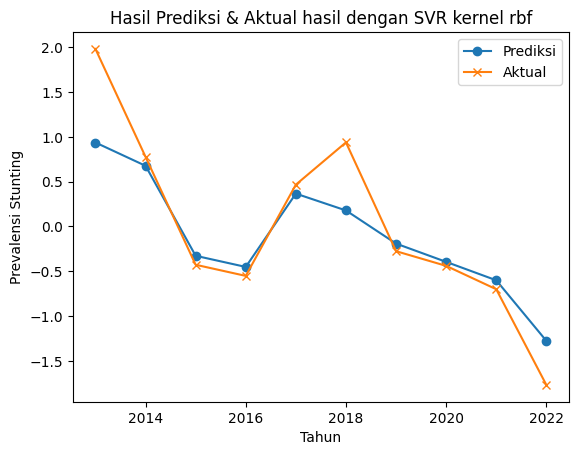

In [99]:
# ploting actual & prediction
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(tahun, svr_rbf_pred, marker='o')
plt.plot(tahun, dataTerskala_Y,  marker='x')

plt.xlabel('Tahun')
plt.ylabel('Prevalensi Stunting')

plt.title("Hasil Prediksi & Aktual hasil dengan SVR kernel rbf")
plt.legend(['Prediksi', 'Aktual']);

# **SVR kerner Linear**

In [100]:
from sklearn.svm import SVR

svr_linear = SVR(kernel="linear", gamma="auto", epsilon=0.5)
svr_linear.fit(dataTerskala_X, dataTerskala_Y)

SVR(epsilon=0.5, gamma='auto', kernel='linear')

In [101]:
svr_linear_pred = svr.predict(dataTerskala_X)

svr_linear_MAE = mean_absolute_error(dataTerskala_Y, svr_linear_pred)
svr_linear_MSE = mean_squared_error(dataTerskala_Y, svr_linear_pred)
svr_linear_RMSE = mean_squared_error(dataTerskala_Y, svr_linear_pred, squared=False)
svr_linear_R2 = r2_score(dataTerskala_Y, svr_linear_pred)
svr_linear_MAPE = mean_absolute_percentage_error(dataTerskala_Y, svr_linear_pred)

Algoritma.append('SVR kernel liniear')
MAE.append(svr_linear_MAE)
MSE.append(svr_linear_MSE)
RMSE.append(svr_linear_RMSE)
R2.append(svr_linear_R2)
MAPE.append(svr_linear_MAPE)

print("Algoritma SVR kernel liniear")
print("MAE:", svr_linear_MAE)
print("MSE:", svr_linear_MSE)
print("RMSE:", svr_linear_RMSE)
print("R2:", svr_linear_R2)
print("MAPE:", svr_linear_MAPE)

Algoritma SVR kernel liniear
MAE: 0.29252387453493023
MSE: 0.1968600454536902
RMSE: 0.4436891315478555
R2: 0.8031399545463098
MAPE: 0.29251114242573445


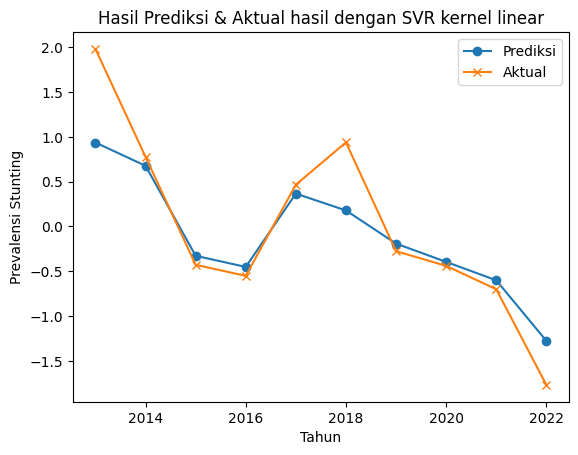

In [102]:
# ploting actual & prediction
plt.plot(tahun, svr_linear_pred, marker='o')
plt.plot(tahun, dataTerskala_Y,  marker='x')

plt.xlabel('Tahun')
plt.ylabel('Prevalensi Stunting')

plt.title("Hasil Prediksi & Aktual hasil dengan SVR kernel linear")
plt.legend(['Prediksi', 'Aktual']);

# **Ordinary Least Square (OLS) Regression**

In [103]:
from statsmodels.formula.api import ols
olsReg = ols(formula='target ~ tahun + x1 + x2 + x3 + x4 + x5 + x6', data=pd.DataFrame(dataTerskala, columns=['target', 'tahun', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']))
modelOls = olsReg.fit()

In [104]:
print(modelOls.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     8.975
Date:                Sat, 16 Dec 2023   Prob (F-statistic):              0.104
Time:                        01:51:51   Log-Likelihood:                 3.2033
No. Observations:                  10   AIC:                             9.593
Df Residuals:                       2   BIC:                             12.01
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.106e-16      0.124   4.92e-15      1.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [105]:
dataTerskala_X

array([[-1.5666989 , -1.99878008,  0.28132791, -1.20802441,  1.22632791,
        -0.67754795, -0.97689822],
       [-1.21854359, -2.00014025,  0.27303659,  0.84482753,  1.48131145,
        -0.97880272, -1.02109871],
       [-0.87038828,  0.47946239,  0.29358463, -2.47131792, -2.06514101,
        -1.44523636, -0.8945706 ],
       [-0.52223297,  0.49374425,  0.31593513,  0.13422493,  0.68702644,
        -1.63479876, -0.92257549],
       [-0.17407766,  0.45565929,  0.34513498,  0.84482753, -0.73005021,
         0.72332609, -1.06867328],
       [ 0.17407766,  0.49578451,  0.34657695,  0.13422493, -0.73005021,
         0.72332609,  0.38454423],
       [ 0.52223297,  0.49714469,  0.37902122,  0.29213662, -0.43971498,
         0.61477998,  1.10119944],
       [ 0.87038828,  0.51550708,  0.38370762,  0.29213662, -0.14937974,
         0.80984835,  1.13898917],
       [ 1.21854359,  0.51074646,  0.37938172,  0.29213662,  0.24926709,
         0.90030344,  1.13291582],
       [ 1.5666989 ,  0.5508

In [107]:
datasetKompilasi.loc[:,['tahun', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']]

,tahun,x1,x2,x3,x4,x5,x6
0,2013,60.46,95.57,2.12,65.22,55.29,30.71
1,2014,60.44,95.34,2.38,68.61,51.46,29.40
2,2015,96.90,95.91,1.96,21.46,45.53,33.15
3,2016,97.11,96.53,2.29,58.05,43.12,32.32
4,2017,96.55,97.34,2.38,39.21,73.10,27.99
5,2018,97.14,97.38,2.29,39.21,73.10,71.06
6,2019,97.16,98.28,2.31,43.07,71.72,92.30
7,2020,97.43,98.41,2.31,46.93,74.20,93.42
8,2021,97.36,98.29,2.31,52.23,75.35,93.24
9,2022,97.95,4.61,2.38,55.17,76.17,93.04


In [108]:
pd.DataFrame(dataTerskala_X, columns=['tahun', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'])

,tahun,x1,x2,x3,x4,x5,x6
0,-1.566699,-1.998780,0.281328,-1.208024,1.226328,-0.677548,-0.976898
1,-1.218544,-2.000140,0.273037,0.844828,1.481311,-0.978803,-1.021099
2,-0.870388,0.479462,0.293585,-2.471318,-2.065141,-1.445236,-0.894571
3,-0.522233,0.493744,0.315935,0.134225,0.687026,-1.634799,-0.922575
4,-0.174078,0.455659,0.345135,0.844828,-0.730050,0.723326,-1.068673
5,0.174078,0.495785,0.346577,0.134225,-0.730050,0.723326,0.384544
6,0.522233,0.497145,0.379021,0.292137,-0.439715,0.614780,1.101199
7,0.870388,0.515507,0.383708,0.292137,-0.149380,0.809848,1.138989
8,1.218544,0.510746,0.379382,0.292137,0.249267,0.900303,1.132916
9,1.566699,0.550872,-2.997707,0.844828,0.470403,0.964802,1.126168


In [109]:
olsReg_pred = modelOls.predict(pd.DataFrame(dataTerskala_X, columns=['tahun', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']))

olsReg_MAE = mean_absolute_error(dataTerskala_Y, olsReg_pred)
olsReg_MSE = mean_squared_error(dataTerskala_Y, olsReg_pred)
olsReg_RMSE = mean_squared_error(dataTerskala_Y, olsReg_pred, squared=False)
olsReg_R2 = r2_score(dataTerskala_Y, olsReg_pred)
olsReg_MAPE = mean_absolute_percentage_error(dataTerskala_Y, olsReg_pred)

Algoritma.append('Ordinary Least Square (OLS) Regression')
MAE.append(olsReg_MAE)
MSE.append(olsReg_MSE)
RMSE.append(olsReg_RMSE)
R2.append(olsReg_R2)
MAPE.append(olsReg_MAPE)

print("Algoritma Ordinary Least Square (OLS) Regression")
print("MAE:", olsReg_MAE)
print("MSE:", olsReg_MSE)
print("RMSE:", olsReg_RMSE)
print("R2:", olsReg_R2)
print("MAPE:", olsReg_MAPE)

Algoritma Ordinary Least Square (OLS) Regression
MAE: 0.11968994700151185
MSE: 0.030852530114261683
RMSE: 0.1756488830430233
R2: 0.9691474698857383
MAPE: 0.2295402732672906


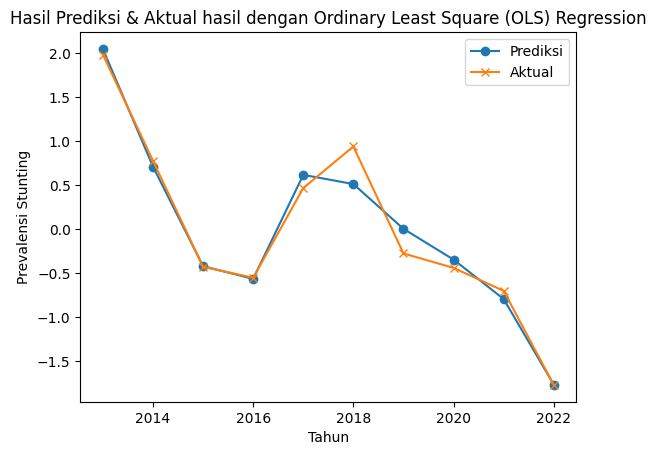

In [111]:
# ploting actual & prediction
plt.plot(tahun, olsReg_pred, marker='o')
plt.plot(tahun, dataTerskala_Y,  marker='x')

plt.xlabel('Tahun')
plt.ylabel('Prevalensi Stunting')

plt.title("Hasil Prediksi & Aktual hasil dengan Ordinary Least Square (OLS) Regression")
plt.legend(['Prediksi', 'Aktual']);

# **Neural Network (NN)**

In [116]:
import tensorflow as tf
from tensorflow import keras

In [120]:
model = keras.Sequential([
    keras.layers.Input(shape=(7)),        # Input layer
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    keras.layers.Dense(1)                  # Output layer with a single neuron (for regression)
])

In [122]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [123]:
# You can adjust the number of epochs and batch size based on your data and resources.
model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_train, y_train))

Epoch 1/100
1/1 [==============================] - 1s 680ms/step - loss: 0.5041 - val_loss: 0.4859
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 0.4859 - val_loss: 0.4683
Epoch 3/100
1/1 [==============================] - 0s 43ms/step - loss: 0.4683 - val_loss: 0.4514
Epoch 4/100
1/1 [==============================] - 0s 38ms/step - loss: 0.4514 - val_loss: 0.4353
Epoch 5/100
1/1 [==============================] - 0s 38ms/step - loss: 0.4353 - val_loss: 0.4197
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 0.4197 - val_loss: 0.4048
Epoch 7/100
1/1 [==============================] - 0s 41ms/step - loss: 0.4048 - val_loss: 0.3906
Epoch 8/100
1/1 [==============================] - 0s 41ms/step - loss: 0.3906 - val_loss: 0.3769
Epoch 9/100
1/1 [==============================] - 0s 37ms/step - loss: 0.3769 - val_loss: 0.3637
Epoch 10/100
1/1 [==============================] - 0s 34ms/step - loss: 0.3637 - val_loss: 0.3512
Epoch 11/100
1/1 [

In [124]:
test_loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

1/1 [==============================] - 0s 25ms/step - loss: 3.2535
Test Loss: 3.2535


In [125]:
nn_pred = model.predict(dataTerskala_X)

nn_MAE = mean_absolute_error(dataTerskala_Y, nn_pred)
nn_MSE = mean_squared_error(dataTerskala_Y, nn_pred)
nn_RMSE = mean_squared_error(dataTerskala_Y, nn_pred, squared=False)
nn_R2 = r2_score(dataTerskala_Y, nn_pred)
nn_MAPE = mean_absolute_percentage_error(dataTerskala_Y, nn_pred)

Algoritma.append('Neural Network (NN)')
MAE.append(nn_MAE)
MSE.append(nn_MSE)
RMSE.append(nn_RMSE)
R2.append(nn_R2)
MAPE.append(nn_MAPE)

print("Algoritma Neural Network (NN)")
print("MAE:", nn_MAE)
print("MSE:", nn_MSE)
print("RMSE:", nn_RMSE)
print("R2:", nn_R2)
print("MAPE:", nn_MAPE)

1/1 [==============================] - 0s 67ms/step
Algoritma Neural Network (NN)
MAE: 0.4582214841626387
MSE: 0.6836507976798009
RMSE: 0.8268317831819244
R2: 0.31634920232019903
MAPE: 0.37074686314082983


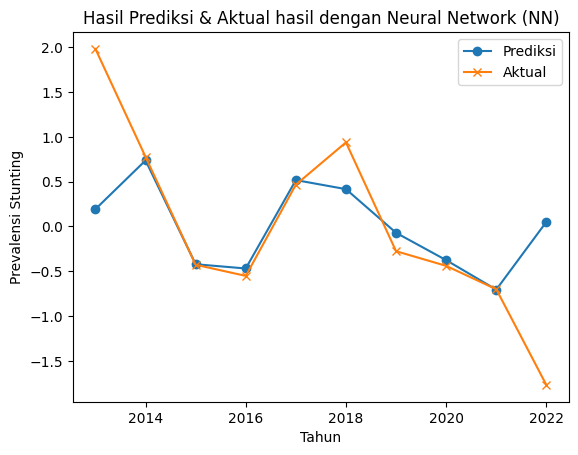

In [126]:
# ploting actual & prediction
plt.plot(tahun, nn_pred, marker='o')
plt.plot(tahun, dataTerskala_Y,  marker='x')

plt.xlabel('Tahun')
plt.ylabel('Prevalensi Stunting')

plt.title("Hasil Prediksi & Aktual hasil dengan Neural Network (NN)")
plt.legend(['Prediksi', 'Aktual']);

# **RBF Network**

In [127]:
import numpy as np

class RBFNetwork:
    def __init__(self, num_centers, sigma):
        self.num_centers = num_centers
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def _calculate_activations(self, X):
        num_samples = X.shape[0]
        num_features = X.shape[1]
        activations = np.zeros((num_samples, self.num_centers))

        for i in range(num_samples):
            for j in range(self.num_centers):
                distance = np.linalg.norm(X[i] - self.centers[j])
                activations[i][j] = np.exp(-distance**2 / (2 * self.sigma**2))

        return activations

    def fit(self, X, y):
        self.centers = X[np.random.choice(X.shape[0], self.num_centers, replace=False)]
        activations = self._calculate_activations(X)

        self.weights = np.linalg.pinv(activations.T @ activations) @ activations.T @ y

    def predict(self, X):
        activations = self._calculate_activations(X)
        return activations @ self.weights

In [128]:
num_centers = 2
sigma = 1.0

rbf_net = RBFNetwork(num_centers, sigma)
rbf_net.fit(x_test, y_test)

In [129]:
rbf_net_pred = rbf_net.predict(dataTerskala_X)

rbf_net_MAE = mean_absolute_error(dataTerskala_Y, rbf_net_pred)
rbf_net_MSE = mean_squared_error(dataTerskala_Y, rbf_net_pred)
rbf_net_RMSE = mean_squared_error(dataTerskala_Y, rbf_net_pred, squared=False)
rbf_net_R2 = r2_score(dataTerskala_Y, rbf_net_pred)
rbf_net_MAPE = mean_absolute_percentage_error(dataTerskala_Y, rbf_net_pred)

Algoritma.append('RBF Network')
MAE.append(rbf_net_MAE)
MSE.append(rbf_net_MSE)
RMSE.append(rbf_net_RMSE)
R2.append(rbf_net_R2)
MAPE.append(rbf_net_MAPE)

print("Algoritma RBF Network")
print("MAE:", rbf_net_MAE)
print("MSE:", rbf_net_MSE)
print("RMSE:", rbf_net_RMSE)
print("R2:", rbf_net_R2)
print("MAPE:", rbf_net_MAPE)

Algoritma RBF Network
MAE: 0.43693875529912196
MSE: 0.26702809741890887
RMSE: 0.5167476148168552
R2: 0.7329719025810911
MAPE: 0.7731093259921824


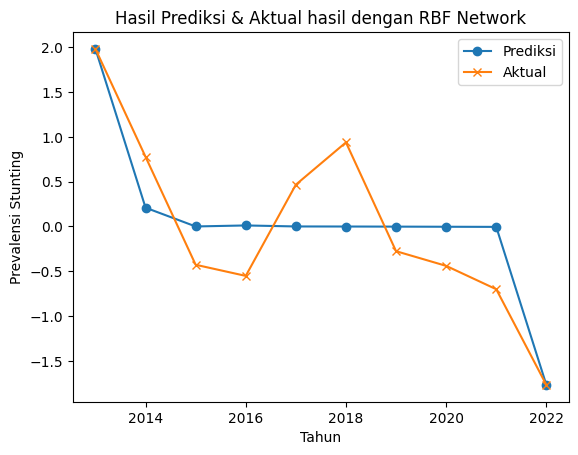

In [130]:
# ploting actual & prediction
plt.plot(tahun, rbf_net_pred, marker='o')
plt.plot(tahun, dataTerskala_Y,  marker='x')

plt.xlabel('Tahun')
plt.ylabel('Prevalensi Stunting')

plt.title("Hasil Prediksi & Aktual hasil dengan RBF Network")
plt.legend(['Prediksi', 'Aktual']);

# **Evalusi**

In [131]:
# dictionary of lists
dict = {'Algoritma': Algoritma, 'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE, 'MAPE': MAPE}
dfEvaluasi = pd.DataFrame(dict)
dfEvaluasi

,Algoritma,MAE,MSE,RMSE,MAPE
0,SVR kernel rbf,0.292524,0.196860,0.443689,0.292511
1,SVR kernel liniear,0.292524,0.196860,0.443689,0.292511
2,Ordinary Least Square (OLS) Regression,0.119690,0.030853,0.175649,0.229540
3,Neural Network (NN),0.458221,0.683651,0.826832,0.370747
4,RBF Network,0.436939,0.267028,0.516748,0.773109


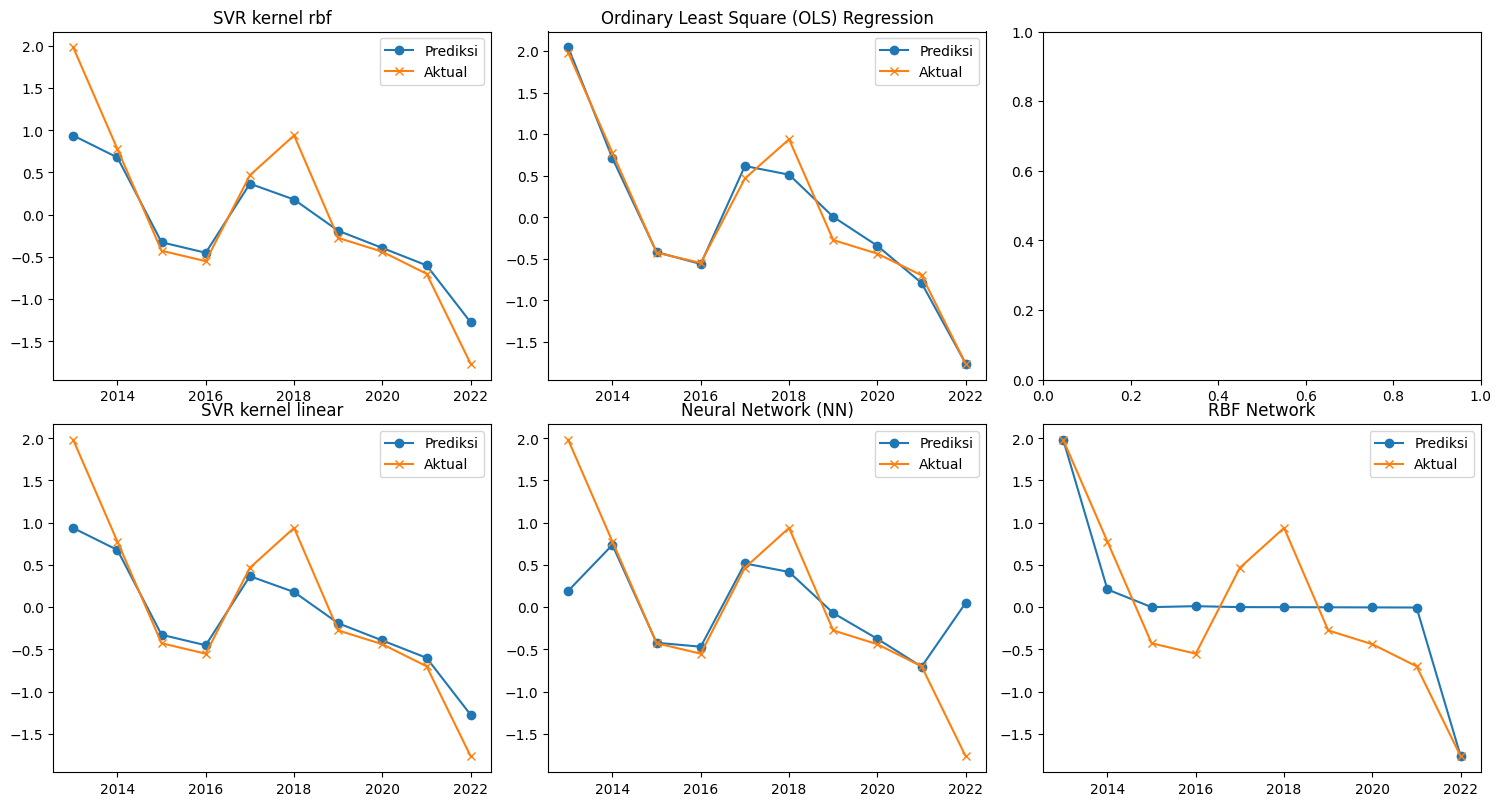

In [140]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

fig.tight_layout()

axs[0, 0].plot(tahun, svr_rbf_pred, marker='o')
axs[0, 0].plot(tahun, dataTerskala_Y,  marker='x')
axs[0, 0].set_title("SVR kernel rbf")
axs[0, 0].legend(['Prediksi', 'Aktual']);

axs[1, 0].plot(tahun, svr_linear_pred, marker='o')
axs[1, 0].plot(tahun, dataTerskala_Y,  marker='x')
axs[1, 0].set_title("SVR kernel linear")
axs[1, 0].legend(['Prediksi', 'Aktual']);

axs[0, 1].plot(tahun, olsReg_pred, marker='o')
axs[0, 1].plot(tahun, dataTerskala_Y,  marker='x')
axs[0, 1].set_title("Ordinary Least Square (OLS) Regression")
axs[0, 1].legend(['Prediksi', 'Aktual']);

axs[1, 1].plot(tahun, nn_pred, marker='o')
axs[1, 1].plot(tahun, dataTerskala_Y,  marker='x')
axs[1, 1].set_title("Neural Network (NN)")
axs[1, 1].legend(['Prediksi', 'Aktual']);

axs[1, 2].plot(tahun, rbf_net_pred, marker='o')
axs[1, 2].plot(tahun, dataTerskala_Y,  marker='x')
axs[1, 2].set_title("RBF Network")
axs[1, 2].legend(['Prediksi', 'Aktual']);